# 0) Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, SelectionRangeSlider
from tqdm import tqdm
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

warnings.filterwarnings("ignore")
sns.set_theme()
pd.set_option('display.max_rows', None)
# import pycountry as pc
# import matplotlib.ticker as mtick

In [2]:
## Data Ingestion
data = pd.read_csv('hotel_bookings.csv', parse_dates=['reservation_status_date'])

## Show the 5 rows of the dataset
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


---

After going through with the [original dataset documentation](https://www.sciencedirect.com/science/article/pii/S2352340918315191) , I tabulated the information into the following table:

**<center> Table 1: Variables description </center>**

| Attribute | Description | Notes | Data Type |
| --- | --- | --- | --- |
| **hotel** | Hotel Type | Resort Hotel <br> City Hotel | Categorical |
| **is_canceled** | Value indicating if the booking was canceled | (1) is cancelled <br> (0) is not cancelled | Categorical |
| **lead_time** | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | - | Integer |
| **arrival_date_year** | Year of arrival date | - | Integer |
| **arrival_date_month** | Month of arrival date with 12 categories | “January” to “December” | Categorical |
| **arrival_date_week_number** | Week number of the arrival date | - | Integer |
| **arrival_date_day_of_month** | Day of the month of the arrival date | - | Integer |
| **stays_in_weekend_nights** | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | - | Integer |
| **stays_in_week_nights** | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | - | Integer |
| **adults** | Number of adults | - | Integer |
| **children** | Number of children | - | Integer |
| **babies** | Number of babies | - | Integer |
| **meal** | Type of meal booked. Categories are presented in standard hospitality meal packages | Undefined/SC – no meal package <br> BB – Bed & Breakfast  <br> HB – Half board (breakfast and one other meal – usually dinner) <br> FB – Full board (breakfast, lunch and dinner) | Categorical |
| **country** | Country of origin. Categories are represented in the ISO 3155–3:2013 format | - | Categorical |
| **market_segment** | Market segment designation | “TA” =  “Travel Agents” <br> “TO” = “Tour Operators” | Categorical |
| **distribution_channel** | Booking distribution channel | “TA” = “Travel Agents” <br> “TO” means “Tour Operators” | Categorical |
| **is_repeated_guest** | Value indicating if the booking name was from a repeated guest | (1) is repeated <br> (0) is not repeated | Categorical |
| **previous_cancellations** | Number of previous bookings that were cancelled by the customer prior to the current booking | - | Integer |
| **previous_bookings_not_canceled** | Number of previous bookings not cancelled by the customer prior to the current booking | - | Integer |
| **reserved_room_type** | Code of room type reserved | Code is presented instead of designation for anonymity reasons | Categorical |
| **assigned_room_type** | Code for the type of room assigned to the booking | Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | Categorical |
| **booking_changes** | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | - | Integer |
| **deposit_type** | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories | No Deposit – no deposit was made <br> Non Refund – a deposit was made in the value of the total stay cost <br> Refundable – a deposit was made with a value under the total cost of stay <br> | Categorical |
| **agent** | ID of the travel agency that made the booking | - | Categorical |
| **company** | ID of the company/entity that made the booking or responsible for paying the booking | ID is presented instead of designation for anonymity reasons | Categorical |
| **days_in_waiting_list** | Number of days the booking was in the waiting list before it was confirmed to the customer | - | Integer |
| **customer_type** | Type of booking, assuming one of four categories | Contract - when the booking has an allotment or other type of contract associated to it <br> Group – when the booking is associated to a group <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | Categorical |
| **adr** | Average Daily Rate | - | Numeric |
| **required_car_parking_spaces** | Number of car parking spaces required by the customer | - | Integer |
| **total_of_special_requests** | Number of special requests made by the customer (e.g. twin bed or high floor) | - | Integer |
| **reservation_status** | Reservation last status, assuming one of three categories | Canceled – booking was canceled by the customer <br> Check-Out – customer has checked in but already departed <br> No-Show – customer did not check-in and did inform the hotel of the reason why <br> | Categorical |
| **reservation_status_date** | Date at which the last status was set | This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | Date |

<br>
Hence, all data preprocessing will be performed by referring to the table above

---

# 1) Data Exploration

Lets explore the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

---

From this code, I found out that there 1 datetime attribute, 4 float attributes, 16 integer attributes, and 11 categorical attributes. This is slightly different with data type in Table 1. After data preprocessing (Section 2.2), we will observe this again later

---

# 2) Descriptive analytics

### Q1. Provide various descriptive analytics and insights
- To perform descriptive analytics, I will analyze dataset distribution

## 2.1) Dataset Distribution & Insights

In [4]:
@interact
def plot_dist(Attribute=data.columns.tolist()[:-1]):     
    sns.displot(data, x=Attribute,  hue='customer_type',col="hotel", kind="hist",multiple="stack").set_xticklabels(rotation=45) 
    print(data.groupby(["hotel"])[Attribute].value_counts())

interactive(children=(Dropdown(description='Attribute', options=('hotel', 'is_canceled', 'lead_time', 'arrival…

From the dataset distribution, I found out that for each attribute:
1) **hotel** = City hotel is booked more than Resort hotel 
2) **is_canceled** = Most booking are not cancelled, however cancelled booking are quite a lot too
3) **lead_time** = Most booking are done near or on the date of arrival and most of them are transient customer
4) **arrival_date_year** = customer arrived for the booking increased from 2015 until 2016 and slightly decreased on 2017
5) **arrival_date_month** = customer arrived for the booking are the highest during Summer season, and lowest during Winter season
6) **arrival_date_week_number** = People arrived for the booking are the highest on week 33 and lowest on week 52
7) **arrival_date_day_of_month** = Most customer arrived for the booking in the middle of the month
8) **stays_in_weekend_nights** = Most customer do not stay on weekend nights, but the are some people who would stay for 1-2 days. 
9) **stays_in_week_nights** = People tend to stay mostly for 2 days during weekdays for City Hotel, while for Resort Hotel, people mostly stay for 1 until 3 days.
10) **adults** = Most people booking for 2 adults (probably newlyweds, or retirees), or 1 adult (probably single or a traveler)
11) **children** = Most customer did not bring any child for the hotel booking
12) **babies** = Most customer did not bring any baby for the hotel booking
13) **meal** = Most customer booked for BB (Bed & Breakfast) followed by  HB (Half board) and SC (no meal package)
14) **country** = For City Hotel most people who booked are from Portugal, France, and Germany. Meanwhile for Resort Hotel, Most people who booked are from Portugal, United Kingdom, and Spain.
15) **market_segment** = Most customer booked using Online Tour Agent, Offline Tour Agent, and Tour Operators. Nowadays, people rarely use complementary market segment for hotel booking
16) **distribution_channel** = Most customer booked using Tour Agents, and Tour Operators, followed by Direct bookings and Corporate booking
17) **is_repeated_guest** = Most of the bookings are by non-repeated guests. Less than 5% of them are repeated guests.
18) **previous_cancellations** = Most customer did not cancel their previous booking prior to the current booking. Less than 3% of them cancelled their bookings prior to the current booking.
19) **previous_bookings_not_canceled** = Most customer did not cancel their previous booking prior to the current booking. Less than 3% of them cancelled their bookings prior to the current booking.
20) **reserved_room_type** = Customers mostly in favour for room type A, followed by D and others for both hotels
21) **assigned_room_type** = In the booking, most customers are assigned for room type A, followed by D and others for both hotels
22) **booking_changes** = Most booking did not make any booking changes. Only 20% of them does
23) **deposit_type** = Most people booking for no deposit, while some booking for non-refundable deposit. It is rare for customer to book for refundable deposit.
24) **agent** = Most customers used Agent ID no 9 for City Hotel booking and Agent ID No 240 for Resort Hotel booking
25) **company** = Most customers used Company ID no 40 for City Hotel booking and Company ID No 223 for Resort Hotel booking
26) **days_in_waiting_list** = Most customers who booked are not in waiting list. Less than 5% of them are from waiting list
27) **customer_type** = Most customers are transient who are usually walk-in guests, last minute or bookers or simply people that require a very short term stay in the hotel
28) **required_car_parking_spaces** = Most customers did not require parking spaces. Less than 2% requires parking spaces.
29) **total_special_requests** = Most customers did not have special request. However those who have special request quite a lot too
30) **reservation_status** = City hotel has more checkout reservation status than Resort hotel. However, City Hotel also has the most cancellation reservation status than Resort hotel. 

## 2.2) Preprocessing Dataset

In [5]:
## Copy the dataset
df = data.copy()

### 2.2.1) Handling rows with missing values
First, lets determine how much the missing values are

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

---

From this output, it seems that there are no missing values, lets try another method

---

In [7]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

----

From here, it is determined that there are 4 columns with missing values which are **"company"**, **"agent"**, **"country"**, and **"children"**.

By referring to Table 1, the preprocessing for those columns are done as follows:<br>1) **company** and **agent** attributes → I replaced the missing values with zeros. (*because they are company ids and agents ids, thus 0 means undefined company id and agent id*)<br>2) **children** attribute → I replaced all the missing values with the mode value. (*because most of customers did not bring any children*)<br>3) **country** attribute →  I replaced all the missing values with the mode value (*because most of customers' countries of origin are from Portugal*)

---

In [8]:
df[['agent','company']] = df[['agent','company']].fillna(0)

---

Children column contains the count of children, so I replaced all the missing values with the rounded mean value.
And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.

---

In [9]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'] = df['country'].fillna(df.country.mode()[0])


## for missing children value, replace it with mode (value that appears most often)
df['children'] = df['children'].fillna(df.children.mode()[0])

## check missing values again
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

---

There they are, no more missing values. Let's convert all data types

---

### 2.2.2) Converting data types

Lets convert all data types based on data type defined in Table 1

---

In [10]:
dtype= {'hotel':'category', 
        'is_canceled':'category', 
        'lead_time':'int64', 
        'arrival_date_year':'category',
        'arrival_date_month':'category', 
        'arrival_date_week_number':'int64',
        'arrival_date_day_of_month':'int64', 
        'stays_in_weekend_nights':'int64',
        'stays_in_week_nights':'int64', 
        'adults':'int64', 
        'children':'int64', 
        'babies':'int64', 
        'meal':'category',
        'country':'category', 
        'market_segment':'category', 
        'distribution_channel':'category',
        'is_repeated_guest':'category', 
        'previous_cancellations':'int64',
        'previous_bookings_not_canceled':'int64', 
        'reserved_room_type':'category',
        'assigned_room_type':'category', 
        'booking_changes':'int64', 
        'deposit_type':'category', 
        'agent':'category',
        'company':'category', 
        'days_in_waiting_list':'int64', 
        'customer_type':'category', 
        'adr':'float',
        'required_car_parking_spaces':'int64', 
        'total_of_special_requests':'int64',
        'reservation_status':'category', 
        'reservation_status_date':'datetime64[ns]'}
df_clean = df.astype(dtype)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  category      
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  category      
 4   arrival_date_month              119390 non-null  category      
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

---

There they are, all data types have been converted based their original data types defined in Table 1. After we have done with Descriptive Analytics, let's proceed for Data Science Use Cases

---

# 3) Data Science Use Cases (For Hotel Owner)
### Q2. Suggest the use cases suitable here from the perspective of the hotel owner?
- To perform for the use cases, I will try to answer the following Questions

1) How Many Booking Were Cancelled?
2) What is the booking ratio between Resort Hotel and City Hotel?
3) What is the percentage of booking for each year?
4) From which country most guests come?
5) How Long People Stay in the hotel?


## 3.1) How Many Booking Were Cancelled?

[Text(0, 0, '74.8508'), Text(0, 0, '25.1492')]

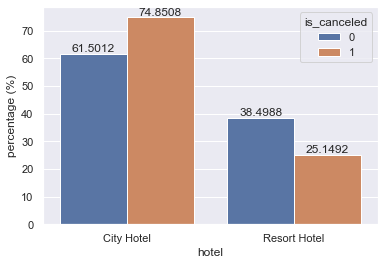

In [11]:
df_agg = df_clean.groupby(["hotel"])['is_canceled'].value_counts().reset_index()
df_agg['percentage (%)'] = 100 * df_agg['is_canceled'] / df_agg.groupby('level_1')['is_canceled'].transform('sum')
df_agg.columns = ['hotel', 'is_canceled', 'count', 'percentage (%)']
ax = sns.barplot(x='hotel',y='percentage (%)', hue='is_canceled',data=df_agg)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

---

From this code, I found out that 74% of customer canceled their booking for the City Hotel which is far higher than Resort Hotel (25%). Meanwhile the trend is also similar for non-cancellation whereby 62% of customer did not canceled their booking in comparison with Resort Hotel. This implies that customer is more attracted to City Hotel during booking, however they also have higher tendency to cancel their booking. Therefore, Resort hotel need to figure out of a strategy to attract customers to be at par with City Hotel. 

---

## 3.2) What is the booking ratio between Resort Hotel and City Hotel?

[Text(0, 0, '61.5012'), Text(0, 0, '38.4988')]

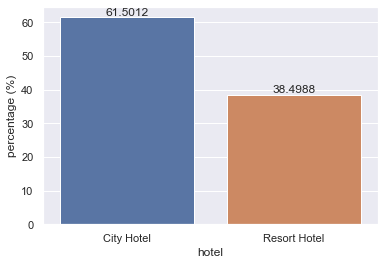

In [12]:
df_agg2 = df_clean[df_clean['is_canceled'] == 0]
df_agg2 = df_agg2['hotel'].value_counts().reset_index()
df_agg2['percentage (%)'] = 100 * df_agg2['hotel']/df_agg2['hotel'].sum()
df_agg2.columns = ['hotel', 'count', 'percentage (%)']
ax = sns.barplot(x='hotel',y='percentage (%)',data=df_agg2)
ax.bar_label(ax.containers[0])

---

From this output, I have determined that the booking ratio between Resort Hotel with City Hotel are 66% and 34% respectively. It seems that City Hotel is highly attractive to the customers for them to book more than Resort Hotel.  Therefore, Resort hotel need to figure out of a strategy to attract customers to be at par with City Hotel. 

---

## 3.3) What is the percentage of booking for each year?

Text(0.5, 1.0, 'arrival_date_year by Hotel\n')

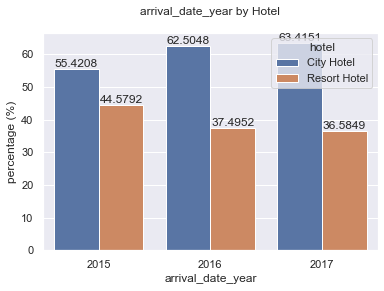

In [13]:
df_agg3 = df_clean[df_clean['is_canceled'] == 0]
df_agg3 = df_agg3.groupby(["hotel"])['arrival_date_year'].value_counts().reset_index()
df_agg3['percentage (%)'] = 100 * df_agg3['arrival_date_year'] / df_agg3.groupby('level_1')['arrival_date_year'].transform('sum')
df_agg3.columns = ['hotel', 'arrival_date_year', 'count', 'percentage (%)']
ax = sns.barplot(x='arrival_date_year',y='percentage (%)', hue='hotel',data=df_agg3)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('arrival_date_year by Hotel\n')

---

Based on the output above, I have determined that the percentage of booking for City Hotel is increasing by 55.4%, 62.5% and 63.4% respectively from 2015 until 2017. However, the percentage of booking for City Hotel is decreasing  by 44.6%, 37.5%, and 36.6% respectively. This shows people preference over the years towards City Hotel rather than Resort Hotel.  Therefore, Resort hotel need to figure out of a strategy to attract customers to be at par with City Hotel. 

---

## 3.4) From which country most guests come?

<AxesSubplot:xlabel='percentage (%)', ylabel='country'>

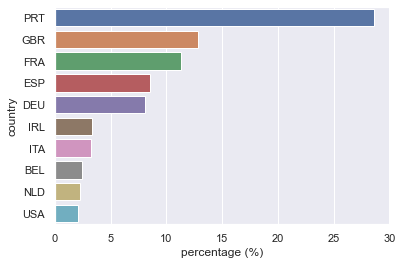

In [14]:
df_agg5 = df_clean[df_clean['is_canceled'] == 0]
df_agg5 = df_agg5['country'].value_counts().reset_index()
df_agg5['percentage (%)'] = 100 * df_agg5['country'] / df_agg5['country'].sum()
df_agg5.columns = ['country', 'count', 'percentage (%)']
df_agg5 = df_agg5.sort_values(by=['percentage (%)'], ascending=False).head(10)
sns.barplot(x='percentage (%)',y='country', data=df_agg5, order=df_agg5.sort_values(by=['percentage (%)'], ascending=False).country)

---

Referring to this horizontal barchart, it is observed that almost 30% of guests came from Portugal (PRT), followed by United Kingdom (GBR), and France (FRA).

---

## 3.5) How Long People Stay in the hotel?

hotel         stays_in_weekend_nights
City Hotel    0                          21561
              1                          12877
              2                          11471
              3                            173
              4                            113
              5                             17
              6                              8
              8                              2
              9                              2
              14                             2
              13                             1
              16                             1
Resort Hotel  0                          10936
              2                           9352
              1                           6742
              4                           1144
              3                            642
              6                             58
              8                             24
              5                             19
Name: stays_in_weekend

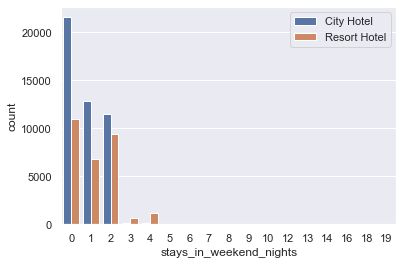

In [15]:
df_agg6 = df_clean[df_clean['is_canceled'] == 0]
print(df_agg6.groupby(['hotel'])['stays_in_weekend_nights'].value_counts()[:20])
sns.countplot(x='stays_in_weekend_nights', hue='hotel', data=df_agg6)
plt.legend(loc='upper right')

---

The above table and chart shows that City Hotel has guests that stay for longest time (by 16 nights), but they are very rare. Nonetheless, there are quite many people who stayed for long time in Resort hotel from 1 to 4 nights. This shows customer tend to stay longer in Resort hotel than City hotel.<br><br>After we have done with Data Science Use Cases (For Hotels), let's  proceed for Data Science Use Cases (For Guests)

---

# 4) Data Science Use Cases (For Guest)
### Q3. Suggest the use cases suitable here from the perspective of the guests?
- To perform use cases, I will try to answer the following Questions

1) Which is the busiest month for hotels?
2) Which was the most booked accommodation type (Single, Couple, Family)?

## 4.1) Which is the busiest month for hotels?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

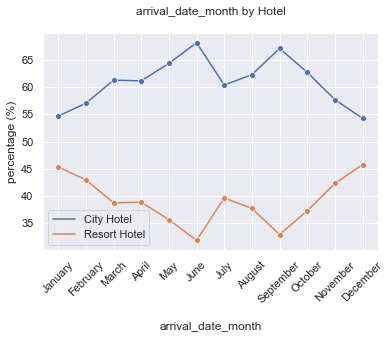

In [16]:
df_agg4 = df_clean[df_clean['is_canceled'] == 0]
df_agg4 = df_agg4.groupby(["hotel"])['arrival_date_month'].value_counts().reset_index()
df_agg4['percentage (%)'] = 100 * df_agg4['arrival_date_month'] / df_agg4.groupby('level_1')['arrival_date_month'].transform('sum')
df_agg4.columns = ['hotel', 'arrival_date_month', 'count', 'percentage (%)']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_agg4['arrival_date_month'] = df_agg4['arrival_date_month'].cat.set_categories(month_order)
ax = sns.lineplot(x='arrival_date_month',y='percentage (%)', hue='hotel',data=df_agg4, marker='o')
plt.title('arrival_date_month by Hotel\n')
plt.legend(loc='lower left')
plt.xlabel('\narrival_date_month')
plt.xticks(rotation=45)

---

Based on the output above, I have determined that the busiest months for both hotels differ by seasons. City hotel is the busiest during the end of summer which is on June and the least busiest during early of winter which is on December. Meanwhile Resort hotel has the opposite trend of City hotel in which Resort hotel is the busiest during winter season (December to February) and the least busiest during Spring season (June) and early of Autumn season (September). This suggests for guests who do not like crowded hotels, it is suggested to them to book Resort hotels than City hotels, especially during Spring season.

---

## 4.2) Which was the most booked accommodation type (Single, Couple, Family)

Text(0.5, 1.0, 'Hotel = Resort hotel')

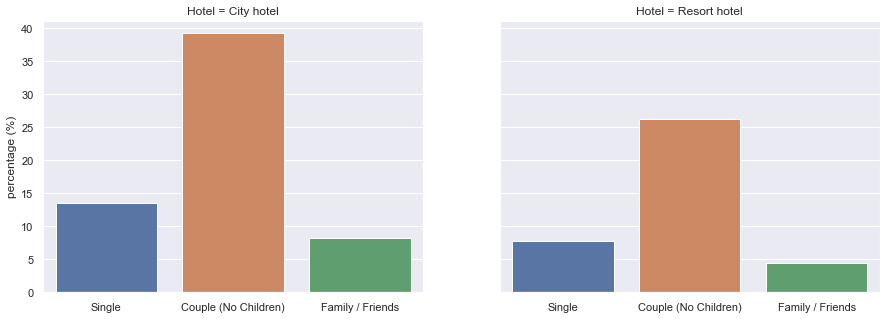

In [17]:
df_agg7 = df_clean[df_clean['is_canceled'] == 0]
single_resort   = df_agg7[(df_agg7['adults']==1) & (df_agg7['children']==0) & (df_agg7['babies']==0) & (df_agg7['hotel']=='Resort Hotel')]
couple_resort   = df_agg7[(df_agg7['adults']==2) & (df_agg7['children']==0) & (df_agg7['babies']==0) & (df_agg7['hotel']=='Resort Hotel')]
family_resort   = df_agg7[(df_agg7['adults'] + df_agg7['children'] + df_agg7['babies'] > 2)  & (df_agg7['hotel']=='Resort Hotel')]

single_city   = df_agg7[(df_agg7['adults']==1) & (df_agg7['children']==0) & (df_agg7['babies']==0) & (df_agg7['hotel']=='City Hotel')]
couple_city   = df_agg7[(df_agg7['adults']==2) & (df_agg7['children']==0) & (df_agg7['babies']==0) & (df_agg7['hotel']=='City Hotel')]
family_city   = df_agg7[(df_agg7['adults'] + df_agg7['children'] + df_agg7['babies'] > 2) & (df_agg7['hotel']=='City Hotel')]

names_resort = ['Single', 'Couple (No Children)', 'Family / Friends']
count_resort = [single_resort.shape[0],couple_resort.shape[0], family_resort.shape[0]]
count_percent_resort = [x/df_agg7.shape[0]*100 for x in count_resort]

names_city = ['Single', 'Couple (No Children)', 'Family / Friends']
count_city = [single_city.shape[0],couple_city.shape[0], family_city.shape[0]]
count_percent_city = [x/df_agg7.shape[0]*100 for x in count_city]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0], x=names_city, y=count_percent_city)
axes[0].set_title('Hotel = City hotel')
axes[0].set_ylabel('percentage (%)')

sns.barplot(ax=axes[1], x=names_resort, y=count_percent_resort)
axes[1].set_title('Hotel = Resort hotel')

---

The above chart describes that similar trend is observed for both hotels in which most of guests who arrived for the booking are Couple with no children, followed by Single guests, and Family guests. This suggests for guests who are newlyweds (Couple with no children), they are recommended to go for City Hotel based on other peoples' preference for the hotel.

---

## 4.3) What is the trend of each accommodation type?

In [18]:
df_agg8 = df_clean[df_clean['is_canceled'] == 0].reset_index(drop=True)
df_agg8['social_status'] = ''
for i in tqdm(range(len(df_agg8))):
    if ((df_agg8['adults'][i]==1) & (df_agg8['children'][i]==0) & (df_agg8['babies'][i]==0)): 
        df_agg8['social_status'][i] = 'single'
    elif ((df_agg8['adults'][i]==2) & (df_agg8['children'][i]==0) & (df_agg8['babies'][i]==0)): 
         df_agg8['social_status'][i] = 'couple (no children)'
    else:
        df_agg8['social_status'][i] = 'family / friends'
        
df_agg8 = df_agg8.groupby(['hotel','reservation_status_date'])['social_status'].value_counts().reset_index(level=['reservation_status_date'])
df_agg8.columns = ['reservation_status_date','count']
df_agg8 = df_agg8.reset_index()

df_agg8 = df_agg8.sort_values(by='reservation_status_date', ascending=True).reset_index(drop=True)
unique_dates = df_agg8.drop_duplicates(subset=['reservation_status_date']).sort_values(by=['reservation_status_date']).reset_index(drop=True)['reservation_status_date'].dt.strftime('%d %b %Y').astype('str').to_list()

options = unique_dates.copy()
index = (0, len(options)-1)

selection_range_slider = SelectionRangeSlider(options=options,index=index,description='Dates',orientation='horizontal',layout={'width': '500px'})

100%|██████████████████████████████████████████████████████████████████████████| 75166/75166 [00:11<00:00, 6275.86it/s]


In [19]:
@interact
def show_plot(date_range=selection_range_slider):
    df_filter = df_agg8.loc[(df_agg8['reservation_status_date'] >=  date_range[0]) & (df_agg8['reservation_status_date'] <=  date_range[1])]
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    df_agg8_city = df_filter[df_filter['hotel'] == 'City Hotel'].reset_index(drop=True)
    ax1 = sns.lineplot(ax=axes[0], x='reservation_status_date', y='count', hue='social_status', data=df_agg8_city)
    ax1.tick_params(axis="x", rotation=45) 
    ax1.set_title('Hotel = City Hotel')
    ax1.set_xlabel('\nreservation_status_date')
    df_agg8_resort = df_filter[df_filter['hotel'] == 'Resort Hotel'].reset_index(drop=True)
    ax2 = sns.lineplot(ax=axes[1], x='reservation_status_date', y='count', hue='social_status', data=df_agg8_resort)
    ax2.tick_params(axis="x", rotation=45)
    ax2.set_title('Hotel = Resort Hotel')
    ax2.set_xlabel('\nreservation_status_date')

interactive(children=(SelectionRangeSlider(description='Dates', index=(0, 804), layout=Layout(width='500px'), …

---

The above line plot shows:<br>1) Couples tend to book hotels in the middle of months<br>2) Singles prefer to book for hotels in early of the month<br> 3) Family or friends tend to book for hotels in the middle of years especially on July<br> 4) Trend of Single people booking is the opposite of Family / friends booking<br><br>This trend can be used as reference for guests to book for hotels for when hotels are crowded (peak dates) and when they are not.<br><br>After we have done with Data Science Use Cases (For Guests), let's proceed for Predictive Modelling. First, I will perform classification task for Predictive Modelling

---

# 5) Predictive Modelling (Classification)
### Q4. Develop a model to predict bookings cancellation and explain the model as well as it’s output.

### 5.1) Data Preparation

In [33]:
useless_col = ['hotel', 'days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df_classification = df_clean.drop(useless_col, axis = 1)

le=LabelEncoder()
df_classification['year'] = df_classification['reservation_status_date'].dt.year
df_classification['month'] = df_classification['reservation_status_date'].dt.month
df_classification['day'] = df_classification['reservation_status_date'].dt.day

df_classification = df_classification.drop(['reservation_status_date','arrival_date_month'] , axis = 1)

a = df_classification.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, df_classification[i].nunique())
    cat_list.append(i)
    
for i in cat_list:
    df_classification[i] = le.fit_transform(df_classification[i])
    
df_classification['year'] = le.fit_transform(df_classification['year'])
df_classification['month'] = le.fit_transform(df_classification['month'])
df_classification['day'] = le.fit_transform(df_classification['day'])

### 5.2) Data Splitting

In [34]:
y = df_classification['is_canceled']
X1 = df_classification.drop('is_canceled', axis = 1)
X2 = pd.get_dummies(df_classification)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y,random_state=42,test_size=0.43)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y,random_state=42,test_size=0.43)

### 5.3) Data Transformation 

In [35]:
scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

### 5.4) Model Training and Evaluation

In [38]:
algorithms = ['Random Forest', 'Decision Tree', 'Support Vector Machine']
metrics    = ['Confusion Matrix', 'Classification Report','Accuracy']
train_scores = {}
pd.set_option('display.max_rows', 10)

In [41]:
@interact
def algorithm_validation(Algorithm=algorithms, Metrics=metrics):        
    if Algorithm == 'Random Forest':
        model = RandomForestClassifier(max_depth=2, random_state=0)
        model.fit(X_train2, y_train1) 
        y_pred = model.predict(X_test2)
        X_test1['Predict'] = model.predict(X_test2)
        
    elif Algorithm == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=0)
        model.fit(X_train2, y_train1) 
        y_pred = model.predict(X_test2)
        X_test1['Predict'] = model.predict(X_test2)
    
    elif Algorithm == 'Support Vector Machine':
        model = SVC(kernel='linear')
        model.fit(X_train2, y_train1) 
        y_pred = model.predict(X_test2)
        X_test1['Predict'] = model.predict(X_test2)
        
    if Metrics == 'Classification Report':
        score = classification_report(y_test2, y_pred)
        
    elif Metrics == 'Accuracy':
        score = accuracy_score(y_test2, y_pred)
        
    elif Metrics == 'Confusion Matrix':
        plot_confusion_matrix(model, X_test2, y_test2)
        score = confusion_matrix(y_test2, y_pred)
        
    return print('\nThe ' + Metrics + ' of ' + Algorithm + ' is:\n\n'+ str(score) + '\n')

interactive(children=(Dropdown(description='Algorithm', options=('Random Forest', 'Decision Tree', 'Support Ve…

---

Classification Report, Accuracy, & Confusion Matrix of Random Forest (RF) explains that the prediction model is able to predict unseen data with 75% accuracy, while both Decision Tree (DT) and Support Vector Machine (SVM) have accuracies of 100%. This means that RF  model is the best model as it can generalise data prediction for booking cancellation very well while DT & SVM are overfitted model that could not predict booking cancellation very well when it sees unseen data. Therefore, Random Forest model is the most suitable for deployment on predicting new datasets.<br><br>After we have done with Predictive Modelling (Classification), finally, let's proceed for Predictive Modelling (Regression)

---

# 6) Predictive Modelling (Regression)
### Q5. Develop a model to predict the number of booking nights for any new booking.

### 6.1) Data Preparation

In [25]:
df_clean['booking_nights'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
useless_col = ['hotel', 'days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df_regression = df_clean.drop(useless_col, axis = 1)

le=LabelEncoder()
df_regression['year'] = df_regression['reservation_status_date'].dt.year
df_regression['month'] = df_regression['reservation_status_date'].dt.month
df_regression['day'] = df_regression['reservation_status_date'].dt.day

df_regression = df_regression.drop(['reservation_status_date','arrival_date_month'] , axis = 1)

a = df_regression.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, df_regression[i].nunique())
    cat_list.append(i)
    
for i in cat_list:
    df_regression[i] = le.fit_transform(df_regression[i])
    
df_regression['year'] = le.fit_transform(df_regression['year'])
df_regression['month'] = le.fit_transform(df_regression['month'])
df_regression['day'] = le.fit_transform(df_regression['day'])

### 6.2) Data Splitting

In [26]:
y = df_regression['booking_nights']
X1 = df_regression.drop('booking_nights', axis = 1)
X2 = pd.get_dummies(df_regression)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y,random_state=42,test_size=0.43)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y,random_state=42,test_size=0.43)

### 6.3) Data Transformation

In [27]:
scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

### 6.4) Model Training & Evaluation

In [28]:
algorithms = ['Linear Regression','Support Vector Regression', 'Random Forest', 'Extra Trees', 'XGBoost']
metrics    = ['Root Mean Squared Error', 'R2 Score', 'Mean Squared Error', 'Mean Absolute Error',  'Mean Absolute Percentage Error']
train_scores = {}
pd.set_option('display.max_rows', 10)

In [29]:
@interact
def algorithm_validation(Algorithm=algorithms, Metrics=metrics):
    if Algorithm == 'Support Vector Regression':
        from sklearn import svm
        svr = svm.SVR()
        svr.fit(X_train2, y_train2)
        y_pred = svr.predict(X_test2)
        X_test1['Predict'] = svr.predict(X_test2)
        
    elif Algorithm == 'Random Forest':
        from sklearn.ensemble import RandomForestRegressor
        rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
        rf.fit(X_train2, y_train2) 
        y_pred = rf.predict(X_test2)
        X_test1['Predict'] = rf.predict(X_test2)
        
    elif Algorithm == 'Extra Trees':
        from sklearn.ensemble import ExtraTreesRegressor
        ext = ExtraTreesRegressor(n_estimators = 100, random_state = 0)
        ext.fit(X_train2, y_train2) 
        y_pred = ext.predict(X_test2)
        X_test1['Predict'] = ext.predict(X_test2)
        
    elif Algorithm == 'XGBoost':
        from xgboost import XGBRegressor
        xgb = XGBRegressor()
        xgb.fit(X_train2, y_train2) 
        y_pred = xgb.predict(X_test2)
        X_test1['Predict'] = xgb.predict(X_test2)
        
    elif Algorithm == 'Linear Regression':
        from sklearn.linear_model import LinearRegression
        lr = LinearRegression()
        lr.fit(X_train2, y_train2) 
        y_pred = lr.predict(X_test2)
        X_test1['Predict'] = lr.predict(X_test2)
        
    if Metrics == 'Mean Squared Error':
        from sklearn.metrics import mean_squared_error
        score = mean_squared_error(y_test2, y_pred)
        train_scores[Algorithm] = mean_squared_error(y_test2, y_pred)
        
    elif Metrics == 'Mean Absolute Error':
        from sklearn.metrics import mean_absolute_error
        score = mean_absolute_error(y_test2, y_pred)
        train_scores[Algorithm] = mean_absolute_error(y_test2, y_pred)
        
    elif Metrics == 'Root Mean Squared Error':
        from sklearn.metrics import mean_squared_error
        score = mean_squared_error(y_test2, y_pred)**(1/2)
        train_scores[Algorithm] = mean_squared_error(y_test2, y_pred)**(1/2)
    
    elif Metrics == 'Mean Absolute Percentage Error':
        from sklearn.metrics import mean_absolute_percentage_error
        score = mean_absolute_percentage_error(y_test2, y_pred)
        train_scores[Algorithm] = mean_absolute_percentage_error(y_test2, y_pred)
        
    elif Metrics == 'R2 Score':
        from sklearn.metrics import r2_score
        score = r2_score(y_test2, y_pred)    
        train_scores[Algorithm] = r2_score(y_test2, y_pred)
        
    print('\nThe ' + Metrics + ' for ' + Algorithm + ' is : ' + str(round(score,2)) + '\n')
    final_df = pd.concat([X_test1,y_test1], axis=1) 
    return final_df

interactive(children=(Dropdown(description='Algorithm', options=('Linear Regression', 'Support Vector Regressi…

---

Based on all model evaluation metrics (RMSE, MSE, MAE, R2 Score, and MAPE), it is found out that all models used in this notebook (Linear Regression, Support Vector Regression, Random Forest, Extra Trees, XGBoost) performed very well with very low error (RMSE, MSE, MAE, & MAPE) and very high R<sup>2</sup> score. Hence, all of these models can be used during model deployment in predicting number of booking night when there is a new dataset comes.

---

**Thank You**